In [27]:
from cProfile import label

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from setuptools.sandbox import save_path

In [28]:
torch.cuda.is_available()
torch.cuda.current_device()

0

In [29]:
weight = 0.8
bias = 0.1

X = torch.arange(0,1,0.01)
y = weight * X + bias

In [30]:
precise_len = int(len(X) * 0.8)
X_train = X[:precise_len]
y_train = y[:precise_len]
X_test = X[precise_len:]
y_test = y[precise_len:]

In [31]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.randn(1))
        self.bias = torch.nn.Parameter(torch.randn(1))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [32]:
model_1 = LinearRegression()
loss_fn = nn.L1Loss() #MAE
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01) #SGD optimizer

In [39]:
epochs = 100
epoch_count = []
loss_vals = []
test_loss_vals = []
for epoch in range(epochs):
    model_1.train() # enable the train mode.

    y_pred = model_1(X_train) #fit on other libraries

    loss = loss_fn(y_train, y_pred) #compute loss

    optimizer.zero_grad() #zero_grad the gradients

    loss.backward() #backpropagation

    optimizer.step() #gradient descent

    model_1.eval()

    with torch.inference_mode():
        y_preds = model_1(X_test)
        test_loss = loss_fn(y_test, y_preds)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_vals.append(loss)
        test_loss_vals.append(test_loss)
        print(f"epoch: {epoch} | loss: {loss} | test_loss: {test_loss}")
        print(model_1.state_dict())

epoch: 0 | loss: 0.17231851816177368 | test_loss: 0.43170469999313354
OrderedDict([('weight', tensor([-0.0596])), ('bias', tensor([0.4376]))])
epoch: 10 | loss: 0.16835609078407288 | test_loss: 0.4144837260246277
OrderedDict([('weight', tensor([-0.0398])), ('bias', tensor([0.4371]))])
epoch: 20 | loss: 0.16468358039855957 | test_loss: 0.39997878670692444
OrderedDict([('weight', tensor([-0.0208])), ('bias', tensor([0.4346]))])
epoch: 30 | loss: 0.16111236810684204 | test_loss: 0.38752424716949463
OrderedDict([('weight', tensor([-0.0024])), ('bias', tensor([0.4306]))])
epoch: 40 | loss: 0.15763138234615326 | test_loss: 0.3764365613460541
OrderedDict([('weight', tensor([0.0156])), ('bias', tensor([0.4256]))])
epoch: 50 | loss: 0.15415039658546448 | test_loss: 0.3653488755226135
OrderedDict([('weight', tensor([0.0335])), ('bias', tensor([0.4206]))])
epoch: 60 | loss: 0.15069177746772766 | test_loss: 0.3556371033191681
OrderedDict([('weight', tensor([0.0511])), ('bias', tensor([0.4146]))])


In [40]:
with torch.inference_mode():
    y_preds = model_1(X_test)
    real_loss = loss_fn(y_test, y_preds)
y_preds

tensor([0.4807, 0.4819, 0.4831, 0.4843, 0.4854, 0.4866, 0.4878, 0.4890, 0.4901,
        0.4913, 0.4925, 0.4937, 0.4949, 0.4960, 0.4972, 0.4984, 0.4996, 0.5007,
        0.5019, 0.5031])

In [41]:
def plot_func(X_train, y_train, X_test, y_test, predictions=None):
    plt.figure(figsize=(12,7))
    plt.plot(X_train, y_train, color='b', label="training chunk")
    plt.plot(X_test, y_test, color='g', label="test_chunk")
    if predictions is not None:
        plt.plot(X_test, predictions, color='r', label="predictions")
    plt.legend()
    plt.show()

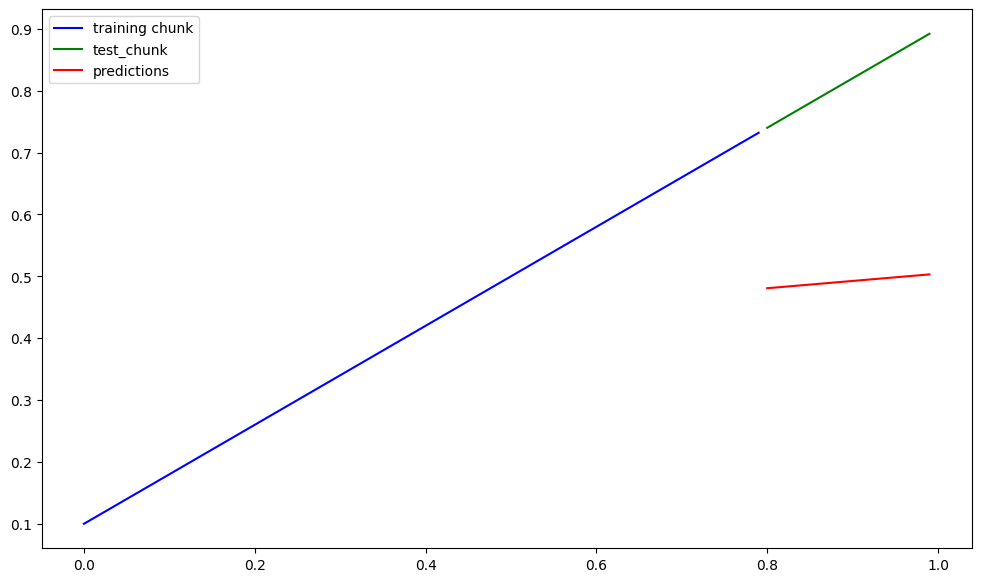

In [42]:
plot_func(X_train, y_train, X_test, y_test, y_preds)

In [37]:
print(test_loss_vals)

[tensor(1.0588), tensor(0.9300), tensor(0.8213), tensor(0.7309), tensor(0.6573), tensor(0.5970), tensor(0.5483), tensor(0.5095), tensor(0.4779), tensor(0.4523)]


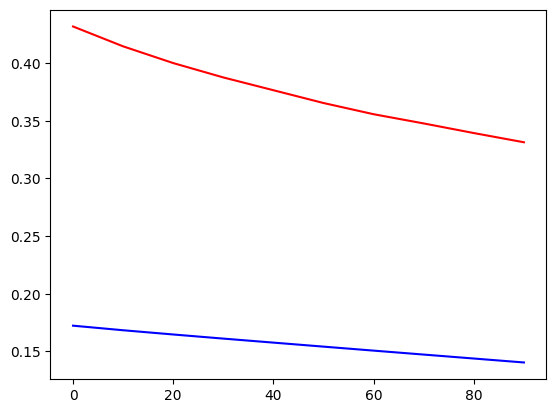

In [43]:
plt.plot(epoch_count, np.array(torch.tensor(loss_vals).cpu().numpy()), color='b')
plt.plot(epoch_count, test_loss_vals, color='r')
plt.show()

In [44]:
#Saving the model
from pathlib import Path

MODEL_PATH = Path("Model_2")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "isolated_pytorch_implementation.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)
print(f"saved model into the {MODEL_SAVE_PATH}")

saved model into the Model_2/isolated_pytorch_implementation.pth
